<a href="https://colab.research.google.com/github/drashoksharma/machine-learning/blob/main/Logistic_Regression_in_Python_Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#use a dataset with 1797 observations, each of which is an image of one handwritten digit. 
#Each image has 64 px, with a width of 8 px and a height of 8 px.

In [2]:
#Step 1: Import Packages for Hand recongition
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Step 2: Get Data directly from scikit-learn with load_digits()
x, y = load_digits(return_X_y=True)

In [4]:
#x is a multi-dimensional array with 1797 rows and 64 columns with integers from 0 to 16. 

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
#y is an one-dimensional array with 1797 integers between 0 and 9.

y

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
#Step 3: Split Data training set and the test set
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#train_test_split() accepts x and y
#x_train: the part of x used to fit the model
#x_test: the part of x used to evaluate the model
#y_train: the part of y that corresponds to x_train
#y_test: the part of y that corresponds to x_test

In [7]:
#Step 4 Scale Data Standardization  the mean of each column becomes equal to zero, and the standard deviation of each column is one
#standardize  inputs by creating an instance of StandardScaler and calling .fit_transform() on it
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [8]:
#Step 5: Create a Model and Train the model
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [9]:
#Step 4: Evaluate the Model
x_test = scaler.transform(x_test)

In [10]:
y_pred = model.predict(x_test)

In [11]:
model.score(x_train, y_train)

0.964509394572025

In [12]:
model.score(x_test, y_test)

0.9416666666666667

In [13]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

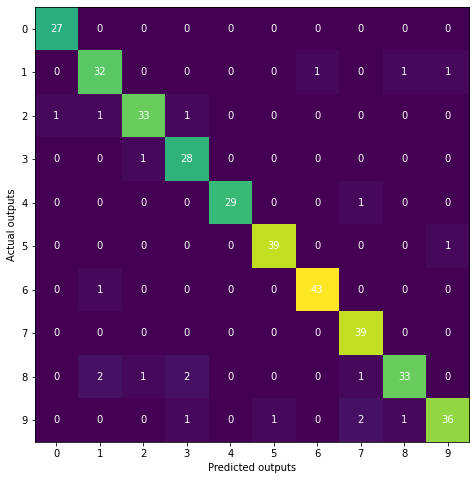

In [19]:
ccm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=10, color='black')
ax.set_ylabel('Actual outputs', fontsize=10, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

